In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, confusion_matrix,precision_score, recall_score,f1_score
import plotly.express as px
import joblib
import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")



In [2]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [5]:
diabetes_dataset = pd.read_csv('diabetes_dataset.csv')
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes_dataset.shape

(768, 9)

In [7]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


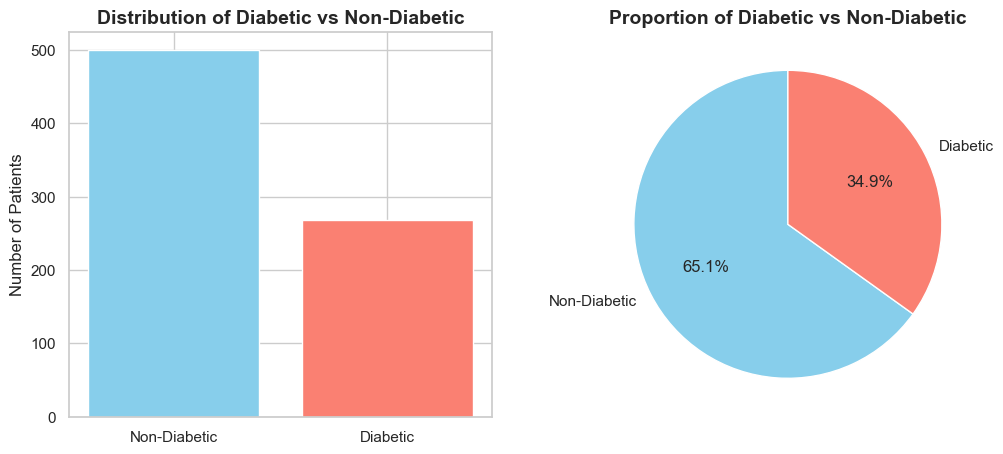

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
outcome_counts = diabetes_dataset['Outcome'].value_counts()
plt.bar(['Non-Diabetic', 'Diabetic'], outcome_counts.values, color=['skyblue', 'salmon'])
plt.title('Distribution of Diabetic vs Non-Diabetic', fontsize=14 , fontweight='bold')
plt.ylabel('Number of Patients', fontsize=12)

plt.subplot(1,2,2)
plt.pie(outcome_counts.values, labels=['Non-Diabetic', 'Diabetic'], autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Proportion of Diabetic vs Non-Diabetic', fontsize=14 , fontweight='bold')
plt.show()

Text(0.5, 1.0, 'Feature Correlation Heatmap')

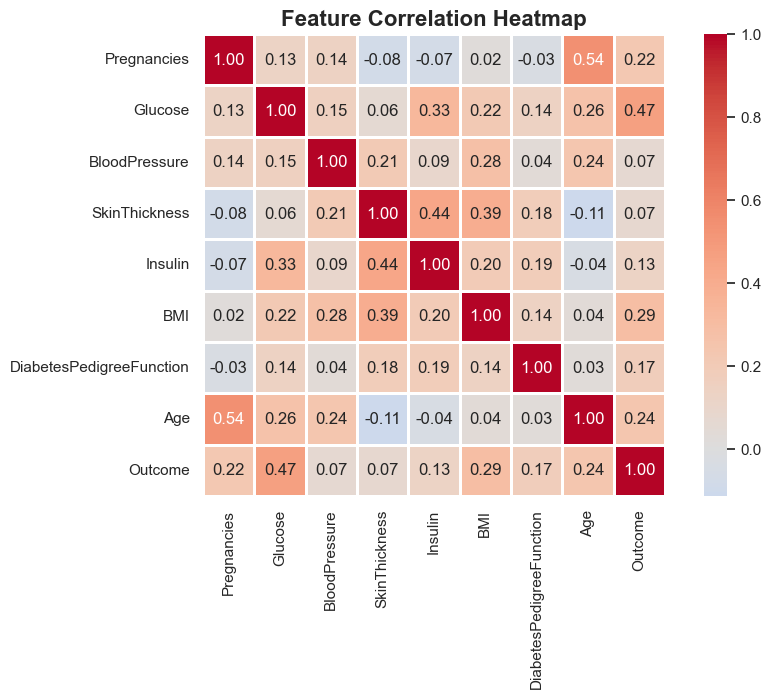

In [11]:
plt.figure(figsize=(10,6))
correlation = diabetes_dataset.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm',center=0, square=True, linewidths=1, fmt=".2f")
plt.title('Feature Correlation Heatmap', fontsize=16 , fontweight='bold')

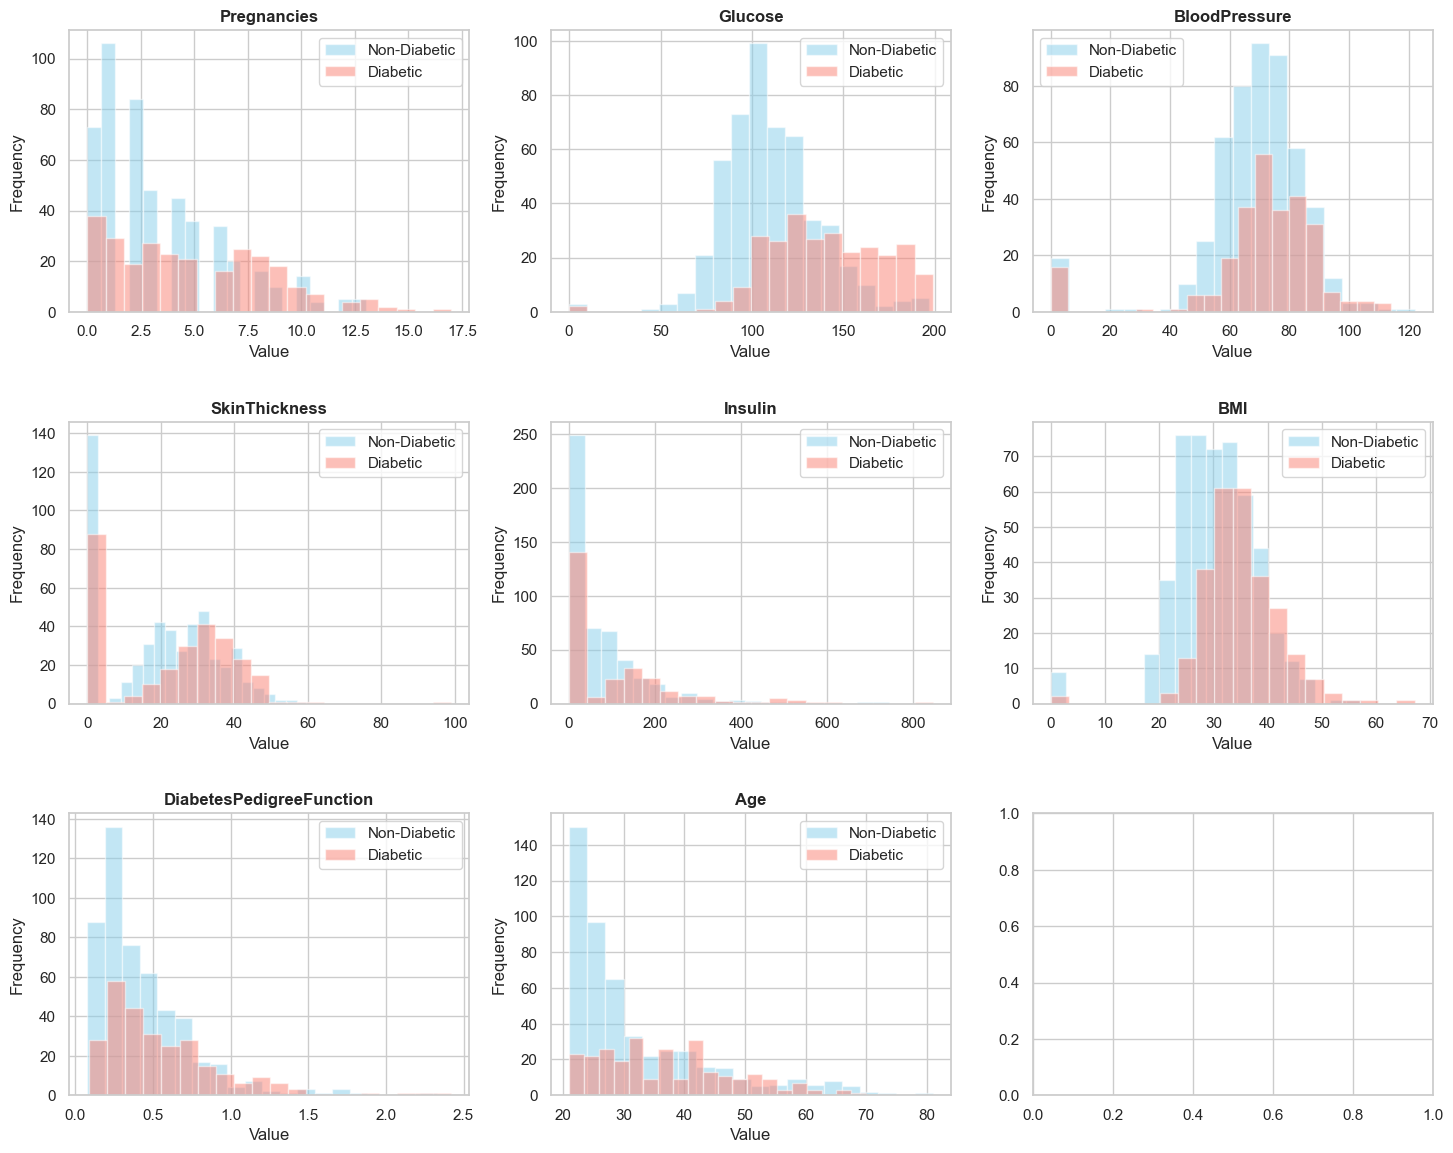

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
features = diabetes_dataset.columns[:-1]

for idx, feature in enumerate(features):
    row = idx // 3
    col = idx % 3

    for outcome in [0, 1]:
        data = diabetes_dataset[diabetes_dataset['Outcome'] == outcome][feature]
        axes[row, col].hist(data, bins=20, alpha=0.5, label='Diabetic' if outcome == 1 else 'Non-Diabetic', color='salmon' if outcome == 1 else 'skyblue')
        axes[row, col].set_title(feature, fontweight='bold')
        axes[row, col].set_xlabel('Value')
        axes[row, col].set_ylabel('Frequency')  
        axes[row, col].legend()
        
plt.tight_layout(pad=2.0, h_pad=2.5, w_pad=1.0)
plt.show()



Data Preprocessing

In [13]:
x = diabetes_dataset.drop(columns='Outcome', axis=1)
y = diabetes_dataset['Outcome']

print(x)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [14]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]], shape=(768, 8))

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)
print(x.shape, x_train.shape, x_test.shape)

(768, 8) (614, 8) (154, 8)


In [16]:
classifier = svm.SVC(kernel='linear', probability=True)
classifier.fit(x_train, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",True
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [17]:
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)
training_data_accuracy

0.7866449511400652

In [18]:
x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(y_test, x_test_prediction)
test_data_accuracy

0.7727272727272727

In [19]:
precision = precision_score(y_test, x_test_prediction)
recall = recall_score(y_test, x_test_prediction)
f1 = f1_score(y_test, x_test_prediction)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Precision: 0.7568
Recall: 0.5185
F1 Score: 0.6154


In [20]:
cm_svm  = confusion_matrix(y_test, x_test_prediction)
cm_svm

array([[91,  9],
       [26, 28]])

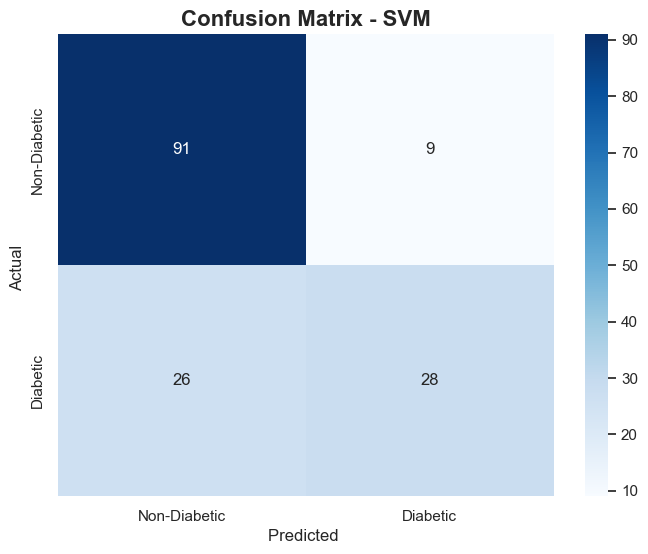

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix - SVM', fontsize=16 , fontweight='bold')
plt.xlabel('Predicted ')
plt.ylabel('Actual ')
plt.show()

Model Training-RandomForest

In [22]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=2)
rf_classifier.fit(x_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [23]:
x_train_prediction_rf = rf_classifier.predict(x_train)

In [24]:
training_data_accuracy_rf = accuracy_score(y_train, x_train_prediction_rf)
training_data_accuracy_rf

1.0

In [25]:
x_test_prediction_rf   = rf_classifier.predict(x_test)

In [26]:
test_data_accuracy_rf  = accuracy_score(y_test, x_test_prediction_rf)
test_data_accuracy_rf

0.7272727272727273

In [27]:
precision_rf = precision_score(y_test, x_test_prediction_rf)
recall_rf = recall_score(y_test, x_test_prediction_rf)
f1_rf = f1_score(y_test, x_test_prediction_rf)

print(f'Precision: {precision_rf:.4f}')
print(f'Recall: {recall_rf:.4f}')   
print(f'F1 Score: {f1_rf:.4f}')

Precision: 0.6500
Recall: 0.4815
F1 Score: 0.5532


In [28]:
cm_rf  = confusion_matrix(y_test, x_test_prediction_rf)
cm_rf

array([[86, 14],
       [28, 26]])

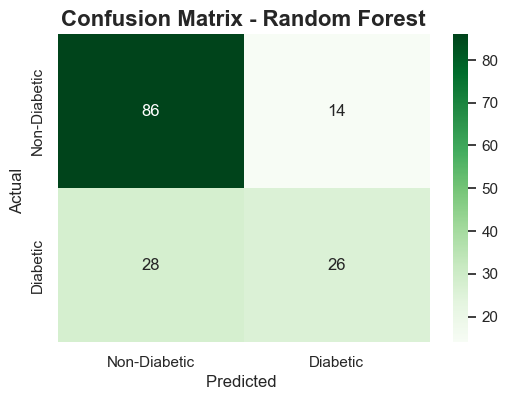

In [29]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix - Random Forest', fontsize=16 , fontweight='bold')
plt.xlabel('Predicted ')    
plt.ylabel('Actual ')
plt.show()

In [30]:
print("SVM Model Accuracy:", test_data_accuracy)
print("Random Forest Model Accuracy:", test_data_accuracy_rf)

SVM Model Accuracy: 0.7727272727272727
Random Forest Model Accuracy: 0.7272727272727273


Decision Tree Classification

In [31]:
dt_classifier = DecisionTreeClassifier(criterion='gini',          # 'gini' (default) or 'entropy'
    max_depth=5,               # ← prevent overfitting (very important!)
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    class_weight='balanced')

dt_classifier.fit(x_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",10
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",5
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current n

In [32]:
x_train_prediction_dt = dt_classifier.predict(x_train)
training_data_accuracy_dt = accuracy_score(y_train, x_train_prediction_dt)
training_data_accuracy_dt

0.7996742671009772

In [33]:
x_test_prediction_dt   = dt_classifier.predict(x_test)
test_data_accuracy_dt  = accuracy_score(y_test, x_test_prediction_dt)
test_data_accuracy_dt

0.7727272727272727

In [34]:
cm_dt  = confusion_matrix(y_test, x_test_prediction_dt)
cm_dt

array([[79, 21],
       [14, 40]])

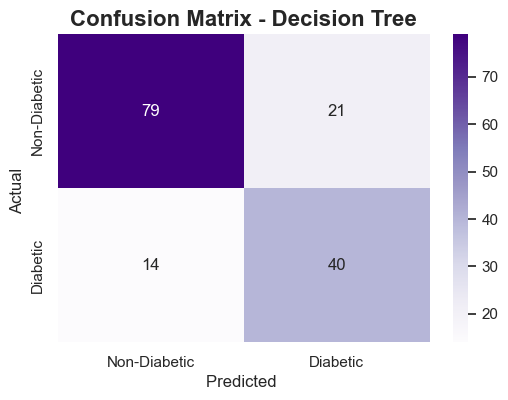

In [35]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Purples', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix - Decision Tree', fontsize=16 , fontweight='bold')
plt.xlabel('Predicted ')    
plt.ylabel('Actual ')
plt.show()

In [36]:
print("SVM Model Accuracy:", test_data_accuracy)
print("Random Forest Model Accuracy:", test_data_accuracy_rf)
print("Decision Tree Classifier Accuracy", test_data_accuracy_dt)

SVM Model Accuracy: 0.7727272727272727
Random Forest Model Accuracy: 0.7272727272727273
Decision Tree Classifier Accuracy 0.7727272727272727


Logistic Regression

In [37]:
lr_classifier = LogisticRegression(
    solver='liblinear',         
    penalty='l1',                
    C=1.0,                       
    class_weight='balanced',    
    random_state=42,
    max_iter=1000)

lr_classifier.fit(x_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'l1'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multicl

In [38]:
x_train_prediction_lr = lr_classifier.predict(x_train)
training_data_accuracy_lr = accuracy_score(y_train, x_train_prediction_lr)
training_data_accuracy_lr

0.7703583061889251

In [39]:
x_test_prediction_lr   = lr_classifier.predict(x_test)
test_data_accuracy_lr  = accuracy_score(y_test, x_test_prediction_lr)
test_data_accuracy_lr

0.7532467532467533

In [40]:
cm_lr  = confusion_matrix(y_test, x_test_prediction_lr)
cm_lr

array([[80, 20],
       [18, 36]])

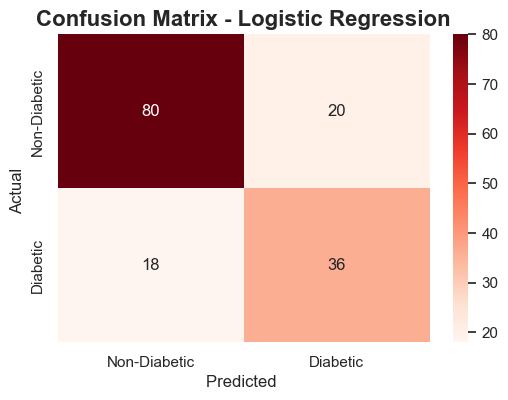

In [41]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Reds', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix - Logistic Regression', fontsize=16 , fontweight='bold')
plt.xlabel('Predicted ')    
plt.ylabel('Actual ')
plt.show()

In [42]:
print("SVM Model Accuracy:", test_data_accuracy)
print("Random Forest Model Accuracy:", test_data_accuracy_rf)
print("Decision Tree Classifier Accuracy", test_data_accuracy_dt)
print("Logistic Regression Accuracy:", test_data_accuracy_lr)

SVM Model Accuracy: 0.7727272727272727
Random Forest Model Accuracy: 0.7272727272727273
Decision Tree Classifier Accuracy 0.7727272727272727
Logistic Regression Accuracy: 0.7532467532467533


KNN Classifier

In [43]:
k_values = range(1, 31, 2)          
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='recall')
    cv_scores.append(scores.mean())

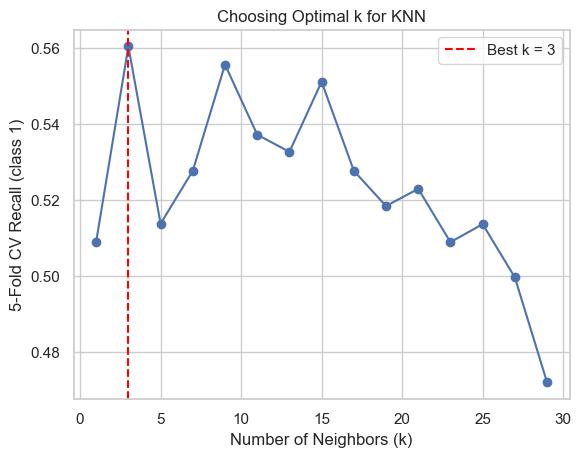

Best k (highest recall): 3 with CV recall ≈ 0.560


In [44]:
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('5-Fold CV Recall (class 1)')
plt.title('Choosing Optimal k for KNN')
plt.grid(True)
best_k = k_values[np.argmax(cv_scores)]
plt.axvline(best_k, color='red', linestyle='--', label=f'Best k = {best_k}')
plt.legend()
plt.show()

print(f"Best k (highest recall): {best_k} with CV recall ≈ {max(cv_scores):.3f}")

In [45]:
knn_classifier = KNeighborsClassifier(
    n_neighbors=best_k,
    weights='uniform',          # 'distance' is alternative
    metric='euclidean'          # or 'manhattan', 'minkowski'
)

knn_classifier.fit(x_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'euclidean'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [46]:
x_train_prediction_knn = knn_classifier.predict(x_train)
training_data_accuracy_knn = accuracy_score(y_train, x_train_prediction_knn)
training_data_accuracy_knn

0.8648208469055375

In [47]:
x_test_prediction_knn   = knn_classifier.predict(x_test)
test_data_accuracy_knn  = accuracy_score(y_test, x_test_prediction_knn)
test_data_accuracy_knn

0.6948051948051948

In [48]:
cm_knn  = confusion_matrix(y_test, x_test_prediction_knn)
cm_knn

array([[84, 16],
       [31, 23]])

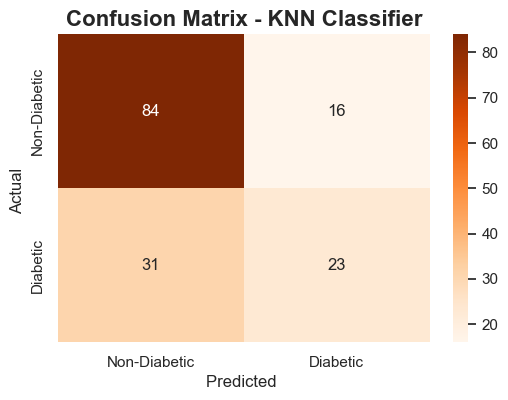

In [49]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Oranges', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix - KNN Classifier', fontsize=16 , fontweight='bold')
plt.xlabel('Predicted ')    
plt.ylabel('Actual ')
plt.show()

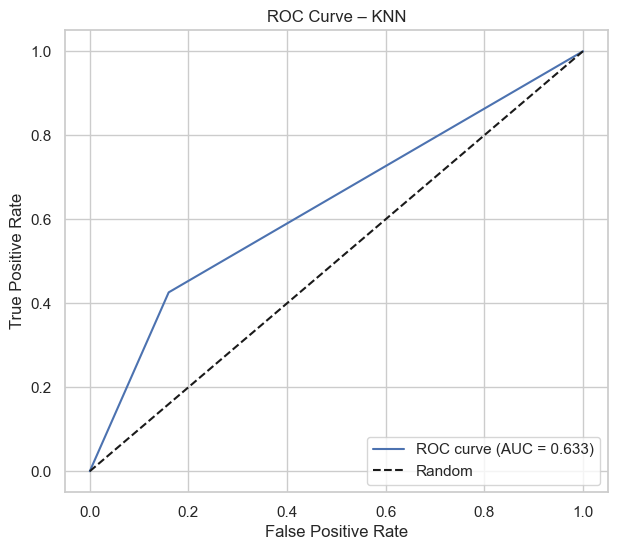

In [50]:
fpr, tpr, _ = roc_curve(y_test, x_test_prediction_knn)
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score(y_test, x_test_prediction_knn):.3f})')
plt.plot([0,1], [0,1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – KNN')
plt.legend(loc='lower right')
plt.show()

In [51]:
print("SVM Model Accuracy:", test_data_accuracy)
print("Random Forest Model Accuracy:", test_data_accuracy_rf)
print("Decision Tree Classifier Accuracy", test_data_accuracy_dt)
print("Logistic Regression Accuracy:", test_data_accuracy_lr)
print("KNN Classifier Accuracy:", test_data_accuracy_knn)

SVM Model Accuracy: 0.7727272727272727
Random Forest Model Accuracy: 0.7272727272727273
Decision Tree Classifier Accuracy 0.7727272727272727
Logistic Regression Accuracy: 0.7532467532467533
KNN Classifier Accuracy: 0.6948051948051948


In [52]:
joblib.dump(classifier, 'diabetes_model.pkl')

['diabetes_model.pkl']

In [53]:
input_data = (5,148,72,35,0,33.6,0.627,50)
input_num_array = np.asarray(input_data)
reshape = input_num_array.reshape(1, -1)

std_data = scaler.transform(reshape)
prediction = classifier.predict(std_data)

In [54]:
prediction

array([1])

In [55]:
joblib.dump(scaler,'scaler_svm.pkl')

['scaler_svm.pkl']